In [1]:
# -*- coding: utf-8 -*-
"""FN_Optimization_Neural_Network.ipynb"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight


In [2]:
df = pd.read_csv("hospital_deterioration_hourly_panel.csv")

df = df.dropna(subset=[df.columns[-1]])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [13]:
X = pd.get_dummies(X, drop_first=True)
X.replace('none', np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [21]:

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(0.5275972288069494), 1: np.float64(9.558880576336936)}


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Recall']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:

model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - Recall: 0.8146 - loss: 5.7653
Epoch 2/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Recall: 0.8510 - loss: 1.3204
Epoch 3/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Recall: 0.9003 - loss: 0.7366
Epoch 4/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9246 - loss: 0.6044
Epoch 5/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - Recall: 0.9409 - loss: 0.5027
Epoch 6/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9530 - loss: 0.4490
Epoch 7/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Recall: 0.9556 - loss: 0.4187
Epoch 8/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9652 - loss: 0.2925
Epoch 9/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9731 - loss: 0.2224
Epoch 10/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9682 - loss: 0.2470
Epoch 11/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Recall: 0.9767 - loss: 0.1666
Epoch 12/50
4313/4313 ━━━━━━━━━━━━━━━━━━━━ 9

In [27]:
THRESHOLD = 0.35

y_probs = model.predict(X_test).flatten()
y_pred = (y_probs >= THRESHOLD).astype(int)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


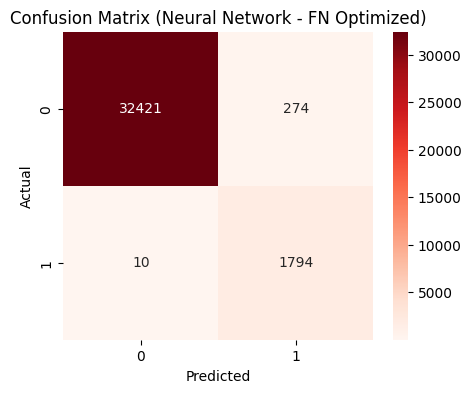

False Negatives: 10
True Positives: 1794


In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network - FN Optimized)')
plt.show()

TN, FP, FN, TP = cm.ravel()
print('False Negatives:', FN)
print('True Positives:', TP)


In [29]:
print('F1-score:', f1_score(y_test, y_pred))


F1-score: 0.9266528925619835
